<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis María Ramírez de la Rosa y Rodolfo Slay Ramos

**Fecha:** 25 de septiembre del 2020.

**Expediente** : 691761 y 715214.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 9 y Clase 10

**Github:** [Repositorio de Tareas](https://github.com/RodoSlay/Tareas_RSlay_LMRamirez)

## Solución de la Tarea

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

## Ejercicio 1.1 RSR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize
from scipy.stats import beta


In [2]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar'):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion)),density = densidad) 
    plt.bar(x[1:],y,label=label)
#     print(len(y),len(x))
    plt.legend()
    plt.show()
    
def Comparar_Aleatorios_Densidad (f, Finv, N):
    u = np.random.uniform(0,1,N)
    f_rand = Finv(u)
    x = np.arange(0.03, .97, 0.01)
    f_densidad = f(x)
    plt.hist(f_rand, density=True, bins=40)
    plt.plot(x, (f_densidad))
    plt.show()

Para poder sacar la inversa tenemos que hacer lo siguiente:

$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$
$$U=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$
$$U=\frac{2}{\pi}\sin^{-1}(\sqrt x)$$
$$\frac{\pi U}{2}=\sin^{-1}(\sqrt x)$$
$$\sin\frac{\pi U}{2}=\sqrt x$$
$$F_{inv} = \sin^2\frac{\pi U}{2}=x$$

Y la derivada se necesita para poder sacar la Funcion de Densidad de Probabilidad

$$\frac{\partial \frac{2}{\pi}\sin^{-1}(\sqrt x)}{\partial x} = $$

$${\partial \frac{2}{\pi}\sin^{-1}(u)}{\partial u} = ,     u = \sqrt x$$

$$\frac{2}{\pi \sqrt {1-u^2}}{du} = ,     du = \frac{1}{2\sqrt x}$$




$$\frac{1}{\pi \sqrt {1-x} \sqrt x} = f(x)$$

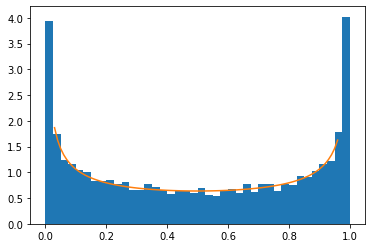

In [3]:
f = lambda x: 1 / (np.sqrt(1-x) * np.sqrt(x) * np.pi)
Finv = lambda u: (np.sin(u * np.pi / 2)) ** 2
N = 10000
Comparar_Aleatorios_Densidad(f, Finv, N);

## Ejercicio 1.1 LMRR
El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$
entonces se tiene que la funcion inversa es:
$$y=\frac{2}{\pi}\sin^{-1}(\sqrt x)  \longrightarrow  \sin^{2}(y\pi/2)=x,\quad 0\leq x\leq 1 $$
Derivando se obtiene la Funcion de Densidad de Probabilidad
$$\frac{\partial}{\partial x} \frac{2}{\pi} \sin^{-1}(\sqrt x)$$
donde $u = \sqrt{x}$, $du = \frac{1}{2 \sqrt{x}}$
$$ f(x) = \frac{2}{\pi} \frac{1}{\sqrt{1-u^{2}}} du = \frac{2}{\pi} \frac{1}{\sqrt{1-x}} \frac{1}{2 \sqrt{x}} = \frac{1}{\pi \sqrt{1-x} \sqrt{x}}$$





In [4]:
# Creamos la función que crea muestras distribuidas de acuerdo a la ecuación anterior
def T_Max_Br(N):
    return (np.sin((np.random.random(N)*np.pi)/2))**2

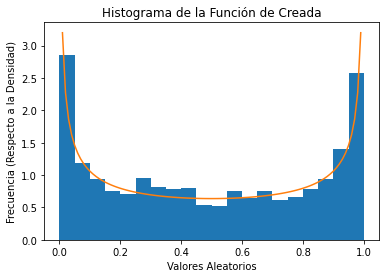

In [5]:
N = 10**3 # Número de muestras
x = T_Max_Br(N)
# Graficamos
f_x = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
x_2 = np.arange(0.01, 1, 0.01)
f_x_2 = f_x(x_2)
plt.hist(x, bins = 20, density = True, cumulative= False)
plt.plot(x_2, (f_x_2))
plt.xlabel('Valores Aleatorios')
plt.ylabel('Frecuencia (Respecto a la Densidad)')
plt.title('Histograma de la Función de Creada')
plt.show()

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

## Ejercicio 1.2 RSR

$$p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$

$$p_{i+1}=P(X=i+1)=\frac{n!}{i+1!(n-(i+1))!}p^{i+1}(1-p)^{n-i-1}$$

Considerando las siguientes propiedades:

$$ n! = n(n-1)!$$

$$ p^{i + 1} = p^i p^1 $$

Y aplicando donde corresponde, entonces podemos afirmar lo siguiente:

$$\frac{p_{i+1}}{p_i}=\frac{P(X=i+1)}{P(X=i)}=\frac{\frac{n!}{i+1!(n-(i+1)!}p^{i+1}(1-p)^{n-i-1}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}} $$

$$\frac{p_{i+1}}{p_i}=\frac{P(X=i+1)}{P(X=i)}=\frac{\frac{n!}{i+1(i)!(n-(i+1))!}p^ip(1-p)^{n-i}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}(1-p)^{1}} $$

$$\frac{p_{i+1}}{p_i} = \frac{n-i}{i+1}\frac{p}{1-p}$$

Para finalmente poder llegar a:

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

Que es a lo que queriamos llegar.


In [6]:
# DE LA MANERA COMO SE VIO EN LA CLASE 12
# Función que calcula la probabilidad acumulada optimizada
def proba_binomial(n:'Cantidad de ensayos',p:'Probabilidad de los eventos',
                   N:'Cantidad de puntos a graficar'):
    Pr = np.zeros(N)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(N-1)]
    return Pr

(3, 100)


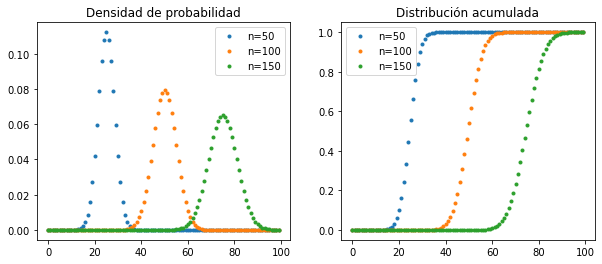

In [7]:
# Comprobación de función creada
# DE LA MANERA COMO SE VIO EN LA CLASE 12
# Distintos parámetros para graficar la función binomial
n = [50,100,150]
# Parámetro p de la dristribución
p = 0.5
# Resultado usando método convencional
P = list(map(lambda x,n: proba_binomial(n,p,100),range(len(n)),n))
P = np.asmatrix(P)
print(P.shape)

def grafica_distribucion_prob(P:'Matriz de probabilidades binomiales'):
    # Gráfica de densidad de probabilidad
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_figwidth(10)
    ax1.plot(P.T,'o',markersize=3)
    ax1.legend(['n=50','n=100','n=150'])
    ax1.set_title('Densidad de probabilidad')
    # ax1.show()

    # Probabilidad acumulada
    F = np.cumsum(P,axis=1)
    # plt.figure(2)
    ax2.plot(F.T,'o',markersize=3)
    ax2.legend(['n=%d'%n[0],'n=%d'%n[1],'n=%d'%n[2]])
    ax2.set_title('Distribución acumulada')

    plt.show()
    
# Gráfica del método convencional y vectorizado
grafica_distribucion_prob(P)

## Ejercicio 1.2 LMRR
Se sabe que

$$p_i=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}\hspace{1cm} (1)$$

y sustituyendo las $i$ de la ecuación (1) por $(i+1)$ también se sabe que 

$$p_{i+1}=\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1} \hspace{1cm} (2)$$

Para comprobar la validez de la ecuación planteada anteriormente, se sustituirá en ella la ecuación (1), resultando en lo siguiente: 

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i = \frac{n-i}{i+1}\frac{p}{1-p}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$ 
para simplificar lo anterior los exponenetes de $p$ se suman por la multiplicación, y los exponentes de $(n-i)$ se restan por la división como se muestra a continuación: 

$$p_{i+1}=\frac{n-i}{i+1}\frac{n!}{i!(n-i)!}p^{i+1}(1-p)^{n-i-1}$$ 

Se simplifican los factoriales de la siguiente forma $(i+1)(i!) = (i+1)!$ y a su vez $(n-i)/(n-i)! = 1/(n-i-1)!$ como se muestra en seguida:

$$ p_{i+1}=\frac{n!}{(i+1)!(n-i-1)!}p^{i+1}(1-p)^{n-i-1}$$

Se observa que el resultado anterior es igual al de la ecuación (2) mostrando la validez de la ecuación planteada inicialmente.

En la metodología mostrada anteriormente para comprobar la ecuación

$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

se observó que la la recursividad de la ecuación para la distribución binomial, por medio de los factoriales y los exponentes permite que el cálculo sea facilmete simplificable reduciendo la cantidad de procedimientos para la resolución de un problema. En términos computacionales, esto implica una gran ventaja ya que hace más rápido los calculos y reduce la carga computacional significativamente.

In [8]:
# Función que calcula la probabilidad acumulada
def P_Binom_acum(n,p,N):
    pr = [(1-p)**n]
    add = pr.append
    for i in range(N+1):
        add(((n-i)/(i+1))*((p)/(1-p))*pr[-1])
    return np.cumsum(pr)

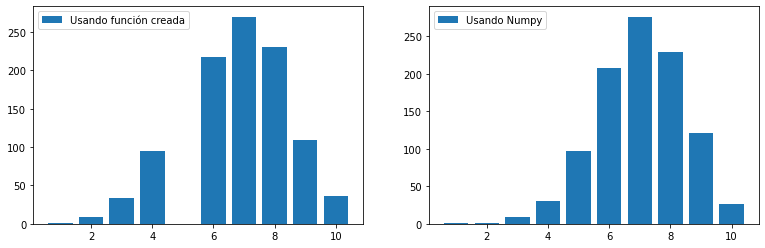

In [9]:
N = 1000
n = 10
p_acum = P_Binom_acum(n,0.7,N)
u = np.random.rand(N)
d_binom = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
d_binom_numpy = np.random.binomial(10, 0.7,N) # con numpu para comparar
vals = list(np.arange(10)+1)
# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
histo, bins = np.histogram(d_binom,bins=10)
plt.bar(vals,histo,label='Usando función creada')
plt.legend()
plt.subplot(122)
histo_2, bins = np.histogram(d_binom_numpy,bins=10)
plt.bar(vals,histo_2, label='Usando Numpy')
plt.legend()
np.histogram
plt.show()

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)
5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)
6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir
7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

## Ejercicio 2.1 RSR

In [10]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayor a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <= f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El maximo punto, en otras palabra a = [1.875].


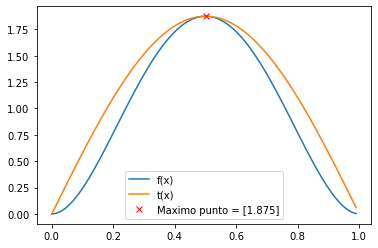

In [11]:
# Función objetivo 
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #El opt te da el maximo, y la f del principio es para evaluar f con 
#el resultado. 
# Función t
t = lambda x: max_f*np.sin(np.pi*x)

a = max_f

x = np.arange(0,1,.01)  # Rango donde se graficará las funciones

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.plot(0.5, a, 'rx' ,label='Maximo punto = {}'.format(a))
plt.legend()
print('El maximo punto, en otras palabra a = {}.'.format(a))

## Ejercicio 2.1 LMRR

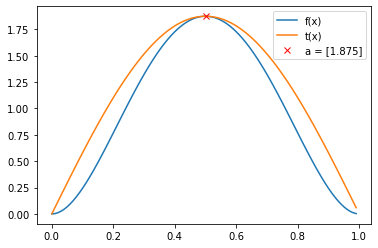

In [12]:
f_x = lambda x:30*(x**2-2*x**3+x**4) 
a = f_x(optimize.fmin(lambda x:-f_x(x),0,disp=False)) # maximo de f_x es lo mismo que el minimo de -f_x
t_x = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,.01)  # Rango donde se graficará las funciones
# Gráficas de las funciones
plt.plot(x,f_x(x),label='f(x)')
plt.plot(x,t_x(x),label='t(x)')
plt.plot(0.5, a, 'rx' ,label='a = {}'.format(a))
plt.legend()

## Ejercicio 2.2 RSR
$g(x) = \frac{t}{c}$ y $g(X)$ es la Funcion de Densidad de Probabilidad

Tambien sabemos que $$c = \int_{0}^{1} t(x) \partial x$$

$$t(x) = a\sin(\pi x)$$

$$c = \int_{0}^{1} a\sin(\pi x) \partial x$$

Como $t(x)$ esta definido entre 0 y 1 y $a = 1.875$

$$c = \int_{0}^{1} 1.875\sin(\pi x) \partial x$$

$$c = -\frac{1.875 \cos(\pi x)}{\pi} \Big|_0^1$$

$$c = \frac{3.75}{\pi}$$

Y evaluando en $g(x)$.

$$g(x) = \frac{t}{c}  $$

$$g(x) = \frac{1.875\sin(\pi x)}{\frac{3.75}{\pi}}  $$

$$g(x) = \frac{\pi \sin(\pi x)}{{2}}  $$

$$g(x) = \frac{\pi \sin(\pi x)}{{2}}  $$

Finv

$$U = \frac{\pi \sin(\pi x)}{{2}}  $$

$$\frac{2U}{\pi} =  \sin(\pi x)  $$

$$ \sin^{-1}\frac{2U}{\pi} =  \pi x$$

$$ \frac{1}{\pi}\sin^{-1}\frac{2U}{\pi} =  x , sustituir  
U $$

$$\frac{1}{\pi}\sin^{-1}({-2U + 1})$$





## Ejercicio 2.2 LMRR
Se tiene que 
$$ y = a \sin(\pi x), \quad -a\leq y\leq a $$
entonces de acuerdo al método de Aceptación-Rechazo, $y$ debe ser integrada en el intervalo [0,1] como se muestra a continuación:
$$ \int_{0}^{1} a \sin(\pi x) dx = a \int_{0}^{1} \sin(\pi x) dx = \frac{a}{\pi} (-\cos(\pi x)) \Big|_{0}^{1} = \frac{a}{\pi} (1 - (-1)) = \frac{2a}{\pi}$$
entonces, este resultante será definido como:
$$c = \int_{0}^{1} a \sin(\pi x) dx = \frac{2a}{\pi}$$
entonces $g(x)$
$$g(x) = \frac{t(x)}{c} = \frac{a \pi \sin(\pi x)}{2 a} = \frac{\pi \sin(\pi x)}{2}$$

## Ejercicio 2.3 RSR
Para Encontrar $G(x)$ que es la distribución acumulada.

$$G(x)=\int_{0}^{x}\frac{\pi\sin(\pi x)}{2} = -\frac{cos(\pi x)}{2}\Big|_{0}^{x}=-\frac{\cos(\pi x)}{2}+\frac{1}{2}$$

Igualamos $G(x)$ a $U$

$$U=-\frac{\cos(\pi x)}{2}+\frac{1}{2}$$

$$2U=-\cos(\pi x)+1$$

$$2U-1=-\cos(\pi x)$$

$$-\cos(2U-1)=\pi x$$

$$x=\frac{\cos^{-1}(-2U+1)}{\pi}$$

Este valor corresponde a $R_2$ que sigue una distribución $g(x)$

## Ejercicio 2.3 LMRR
siguiendo el método de la transformada inversa
$$g(x) = \frac{\pi \sin(\pi x)}{2} = P \longrightarrow \frac{2 P}{\pi} = \sin(\pi x) \longrightarrow \arccos(\frac{2 P}{\pi}) = \pi x $$
finalmente resulta que
$$ x = \frac{\arccos(\frac{2 P}{\pi})}{\pi} $$

para esta ecuación, $\arccos$ esta dado para el intervalo [-1,1], por lo que lo valores de $P$ que cumplen lo anterior son [$\frac{-\pi}{2}$,$\frac{\pi}{2}$]

## Ejercicio 2.4 RSR

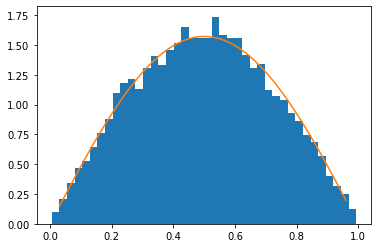

In [13]:
g = lambda x: (np.pi / 2) * np.sin(np.pi * x)
G_inv = lambda u: (1 / np.pi) * np.arccos(-2 * u + 1)
N=10000

Comparar_Aleatorios_Densidad(g, G_inv, N);

## Ejercicio 2.4 LMRR

In [14]:
def distribucion1(a,N):
    return (1/np.pi)*np.arccos((2*np.random.uniform(-np.pi/2,np.pi/2,N))/np.pi)

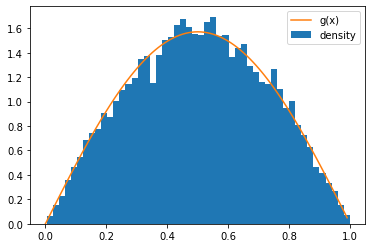

In [15]:
N = 10000
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
g = lambda x: (np.pi /2)*np.sin(np.pi * x) 
x = np.arange(0,1,0.01)
R1 = distribucion1(a,N)
plt.figure(figsize=[6,4])
plt.hist(R1,bins = 50, density = True, label='density')
plt.plot(x,g(x),label='g(x)')
plt.legend()
plt.show()

## Ejercicio 2.5 RSR

El máximo de f es: [1.875]


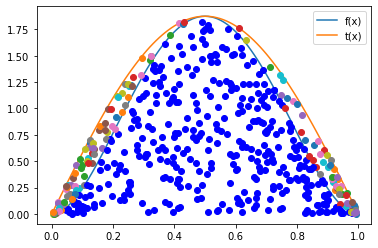

In [16]:
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 
R_2 = lambda u: np.arccos(1-2*u)/np.pi
U = np.random.rand(N)
R2 = R_2(U) #Si queremos distribución que siga el comportamiento de g(x)
R2 = np.random.rand(N)  #Si queremos una distribución normal
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

## Ejercicio 2.5 LMRR

In [17]:
# Función de aceptación y rechazo
def A_R_1(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    for i in range(len(R1)):
        if condition[i]:
            plt.plot(R1[i],R2[i]*t_x[i],'ob')
        else:
            plt.plot(R1[i],R2[i]*t_x[i],'o')
    plt.show()

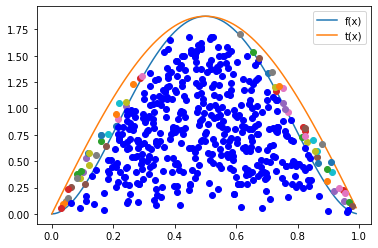

In [18]:
N = 500
f = lambda x: 30*(x**2 - 2*x**3 +x**4)
a = f(optimize.fmin(lambda x: -f(x),0,disp=False))
t = lambda x: a*np.sin(np.pi*x)
x = np.arange(0,1,0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
R1 = distribucion1(a,N) # Es uniforme
R2 = distribucion1(a,N) # Es uniforme
A_R_1(R2,R1,f,t)

## Ejercicio 2.6 RSR

In [19]:
def Acep(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#    R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    d = np.zeros(len(R1))
    condition = np.multiply(R2,t_x)<=f_x
    d = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return d

In [20]:
# Función t -> Función constante
ts = lambda x: max_f*np.sin(np.pi*x)
tc = lambda x: max_f*np.ones(len(x))
x = np.arange(0,1,0.01)

N = 500
R_2 = lambda u: np.arccos(1-2*u)/np.pi
U = np.random.rand(N)
R2 = R_2(U)
R1 = np.random.rand(N)
Aceptacion_Sc = Acep(R2,R1,f,tc)*100/len(R1)
Aceptacion_Ss = Acep(R2,R1,f,ts)*100/len(R1)
print('El porcentaje de puntos de aceptación cuando usas t(x) como constante: ',Aceptacion_Sc,'%')
print('El porcentaje de puntos de aceptación cuando usas t(x) como un pulso senoidal es: ',Aceptacion_Ss,'%')

El porcentaje de puntos de aceptación cuando usas t(x) como constante:  54.2 %
El porcentaje de puntos de aceptación cuando usas t(x) como un pulso senoidal es:  72.8 %


## Ejercicio 2.6 LMRR

In [21]:
# Función de aceptación y rechazo
def A_R_2(R2:'Variables distribuidas ',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = np.multiply(R2,t_x)<=f_x
    ar = np.asarray([1 if condition[i] else 0 for i in range(len(R1))]).sum()
    return ar

def distribucion2(a,N):
    return (1/np.pi)*np.arccos((2*np.random.rand(N)/np.pi))

In [22]:
N = 500
x = np.arange(0,1,0.01)
t_constante = lambda x: a*np.ones(len(x))
t_senoidal = lambda x: a*np.sin(np.pi*x)
R1 = np.random.rand(N)
R2 = distribucion2(a,N)
Aceptacion_Contstante = A_R_2(R2,R1,f_x,t_constante)*100/len(R1)
Aceptacion_Senoidal = A_R_2(R2,R1,f_x,t_senoidal)*100/len(R1)
print('El porcentaje de puntos de aceptación cuando usas t(x) como constante: ',Aceptacion_Sc,'%')
print('El porcentaje de puntos de aceptación cuando usas t(x) como un pulso senoidal es: ',Aceptacion_Ss,'%')

El porcentaje de puntos de aceptación cuando usas t(x) como constante:  54.2 %
El porcentaje de puntos de aceptación cuando usas t(x) como un pulso senoidal es:  72.8 %


## Ejercicio 2.7 RSR

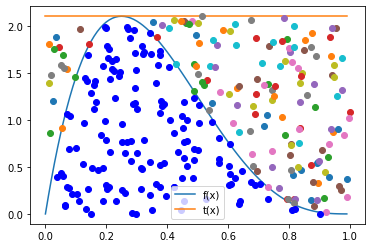

In [23]:
f = lambda x: 20*x*(1-x)**3
a = f(optimize.fmin(lambda x:-f(x),5,disp=False))
t = lambda x: a*np.ones(len(x))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc="best")
N= 300
R2 = np.random.rand(N)
R1 = np.random.rand(N)
Acep_rechazo(R1, R2, f, t)

In [24]:
def dis(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    cont = [ R1[i] for i in range(len(R1)) if condition[i]]
    return cont

[]

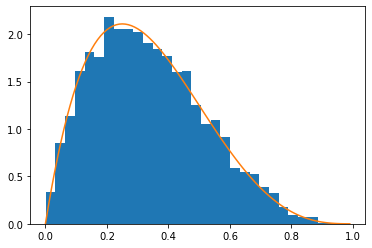

In [25]:
f = lambda x: 20*x*(1-x)**3
a = f(optimize.fmin(lambda x:-f(x),5,disp=False))
t = lambda x: a*np.ones(len(x))
R_1 = lambda u: 20*x*(1-x)**3
x = np.arange(0,1,0.01)
N=10000
R1 = np.random.rand(N)
R2 = np.random.rand(N)
plt.hist(dis(R2,R1,f,t), bins=30, density=True)
plt.plot(x,f(x),label='f(x)')
plt.plot()

## Ejercicio 2.7 LMRR

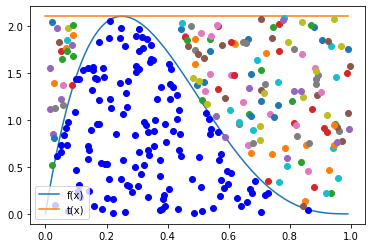

In [26]:
f_7 = lambda x: 20*x*(1-x)**3 # La f
a_7 = f_7(optimize.fmin(lambda x:-f_7(x),0,disp=False)) # Su punto maximo
t_7 = lambda x: a_7*np.ones(len(x)) # La que supera a f
plt.plot(x,f_7(x),label='f(x)')
plt.plot(x,t_7(x),label='t(x)')
plt.legend()
N = 300
R2 = np.random.rand(N)
R1 = np.random.rand(N)
A_R_1(R1, R2, f_7, t_7)

In [27]:
def A_R_3(R2:'Variables distruidas U~U(0,1)',
                  R1:'Variables distribuidas como g(x)',
                  f:'función objetivo a generar',
                  t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    ar = [R1[i] for i in range(len(R1)) if condition[i]]
    return ar

[]

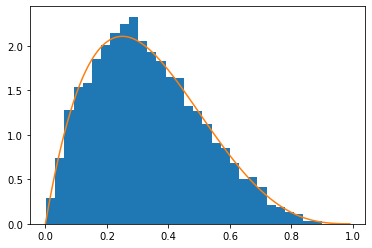

In [28]:
x = np.arange(0,1,0.01)
N = 10000
R1 = np.random.rand(N)
R2 = np.random.rand(N)
plt.hist(A_R_3(R2,R1,f_7,t_7), bins=30, density=True)
plt.plot(x,f_7(x),label='f(x)')
plt.plot()

> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

## Ejercicio 3.1 RSR

Tomamos 
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
y sustituimos $k$ por $k+1$
$$P(k+1) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}$$
separamos $\lambda^{k+1}$ en $\lambda^{k}\lambda^{1}$ y obtenemos
$$P(k+1) = \frac{e^{-\lambda}\lambda^{k}\lambda^{1}}{(k+1)!}$$
usamos la siguiente propiedad $n! = n(n-1)!$ pero con $(k+1)!$ obeteniendo $(k+1)!=(k+1)(k+1-1)!$
$$P(k+1) = \frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)k!}$$
sustituimos $\frac{e^{-\lambda}(\lambda)^k}{k!}=P(k)$
$$P(k+1) = \frac{\lambda}{k+1}P(k)$$

In [29]:
# Función que calcula la probabilidad acumulada optimizada
def P_acum_Poisson(n,l):
    P = np.zeros(n)
    P[0] = np.exp(-l)
    def po(i):
        nonlocal P
        P[i+1]=(l/(i+1))*P[i]
        
    # Lleno el vector Pr usando compresión de listas
    [po(i) for i in range(n-1)]
    return np.cumsum(P)

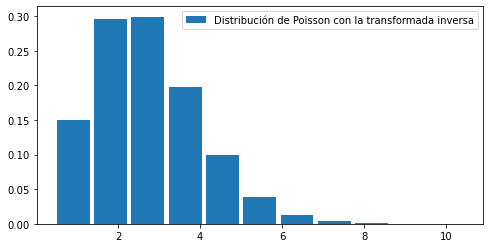

In [30]:
n = 10; l = 2; N = 100000

p_acum = P_acum_Poisson(n,l)
u = np.random.rand(N)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(u,p_acum)
plot_histogram_discrete(d_binomial,'Distribución de Poisson con la transformada inversa')

## Ejercicio 3.1 LMRR
Se sabe de lo anterior 2 cosas, primero que 

$$p_k=\frac{e^{-\lambda}(\lambda)^k}{k!}\hspace{1cm} (1)$$

y también que 

$$p_{k+1}=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!} \hspace{1cm} (2)$$

sustituyendo las $i$ de la ecuación (1) por $(i+1)$. Para que la ecuación (2) quede de forma recursiva, es decir, en términos de $p_k$, se hace lo siguiente, se toma la ecuación (2) y se separan los factoriales de la siguiente forma $(k+1)(k!) = (k+1)!$ y a su vez se separan los exponentes, dando como resultado:

$$p_{k+1} = \frac{e^{-\lambda}(\lambda)^{k}}{k!} \frac{\lambda}{k+1} $$

Lo anterior se puede simplificar sustituyendo la ecuación (1), de forma ya es recursiva.

$$ p_{k+1} = \frac{\lambda}{k+1} p_{k} $$

In [31]:
# Función que calcula la probabilidad acumulada
def P_acum_Poisson(p,N):
    n = N
    pr = [np.exp(-p)]
    add = pr.append
    for i in range(n+1):
        add(((p)/(i+1))*pr[-1])
    return np.cumsum(pr)

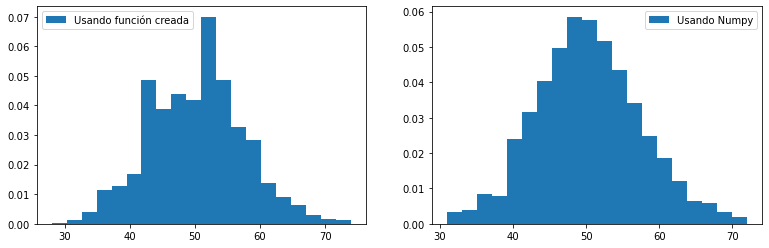

In [32]:
p = 50; N = 10**3
p_acum = P_acum_Poisson(p,N)
u = np.random.rand(N)
# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_poisson = list(map(lambda j:sum(1 for i in p_acum if i<=u[j]),range(N)))
plt.hist(d_poisson,20,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_poi_numpy = np.random.poisson(p,N)
plt.hist(d_poi_numpy,20,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()